In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/apsolutions_test_task/new_training_data_31_08_2022.csv'

Mounted at /content/drive


In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
pd.set_option('display.max_columns', None)
print(df.shape)
df.head(10)

(42529, 75)


,Unnamed: 0,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,isnt_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,isnt_active_12,is_lost_12,overdue_loans_12,micro_loans_active_12,is_active_3,open_sum_3,isnt_active_3,is_lost_3,overdue_loans_3,micro_loans_active_3,is_active_1,open_sum_1,isnt_active_1,is_lost_1,micro_loans_active_1,ratio_all_microloans_3_to_12,ratio_overdue_loans_3_to_12,ratio_history_100,ratio_history_12,fraction_last_x_12,ratio_history_3,fraction_last_x_3,ratio_history_1,fraction_last_x_1,mean_delay_100_with_lag,mean_delay_12_with_lag,mean_delay_3_with_lag,mean_delay_1_with_lag,ratio_mean_delay_3_to_12,count_all_credits,ratio_pattern_len_to_pattern_1,ratio_pattern_len_to_pattern_2,ratio_pattern_len_to_pattern_3,ratio_pattern_len_to_pattern_4,ratio_pattern_len_to_pattern_bad_len,last_microloan_openeddt,is_type_credit_card_100,is_type_consumer_100,is_type_micro_100,is_active_type_credit_card_100,is_active_type_consumer_100,is_active_type_micro_100,is_type_credit_card_12,is_type_consumer_12,is_type_micro_12,is_active_type_credit_card_12,is_active_type_consumer_12,is_active_type_micro_12,is_type_credit_card_3,is_type_consumer_3,is_type_micro_3,is_active_type_credit_card_3,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12,ratio_sum_outstanding_to_open_sum,target
0,0,43.0,81.0,235.0,0.0,4.0,34.0,70.0,0.0,421478.0,4.0,36458.0,3.0,0.0,0.0,18000.0,1.0,8458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.0,0.067308,0.0,0.009615,NaN,0.000000,31.566929,8.015748,0.228346,0.228346,0.028487,127.0,0.0,0.0,0.0,0.0,0.875,289.0,1.0,2.0,115.0,1.0,1.0,32.0,1.0,1.0,5.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.942917,0.0
1,1,35.0,3.0,0.0,0.0,1.0,41.0,36.0,0.0,627578.0,39.0,1902599.0,34.0,0.0,0.0,627578.0,33.0,583578.0,22.0,0.0,0.0,583578.0,14.0,348778.0,5.0,0.0,348778.0,0.794872,NaN,0.0,0.0,0.948052,0.0,0.714286,0.0,0.246753,0.322222,0.322222,0.000000,0.000000,0.000000,90.0,0.0,0.0,0.0,0.0,0.000,3.0,4.0,7.0,78.0,4.0,1.0,36.0,2.0,1.0,78.0,2.0,1.0,36.0,0.0,0.0,62.0,0.0,0.0,33.0,0.0,0.0,20.0,0.0,0.0,14.0,7.0,NaN,0.0
2,2,27.0,19.0,65.0,0.0,7.0,25.0,34.0,0.0,214655.0,9.0,96195.0,6.0,0.0,0.0,96195.0,2.0,29156.0,0.0,0.0,0.0,29156.0,1.0,25436.0,0.0,0.0,25436.0,0.133333,NaN,0.0,0.0,0.254237,0.0,0.033898,0.0,0.016949,36.107692,18.953846,0.000000,0.000000,0.000000,65.0,0.0,0.0,0.0,0.0,0.000,19.0,3.0,2.0,60.0,3.0,1.0,21.0,0.0,0.0,15.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.098896,1.0
3,3,32.0,14.0,76.0,0.0,11.5,13.0,35.0,0.0,88856.0,11.0,88856.0,10.0,0.0,0.0,88856.0,9.0,66856.0,0.0,0.0,0.0,66856.0,5.0,28666.0,0.0,0.0,28666.0,0.360000,NaN,0.0,0.0,0.437500,0.0,0.187500,0.0,0.104167,2.033333,1.550000,1.083333,0.000000,0.698925,60.0,0.0,0.0,0.0,0.0,0.000,14.0,2.0,0.0,58.0,2.0,0.0,11.0,0.0,0.0,25.0,0.0,0.0,11.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,5.0,0.0,0.0,5.0,59.0,0.298009,1.0
4,5,23.0,5.0,0.0,0.0,1.0,26.0,52.0,0.0,345820.0,26.0,371008.0,36.0,0.0,0.0,345820.0,19.0,251720.0,5.0,0.0,0.0,251720.0,12.0,131720.0,2.0,0.0,131720.0,0.366197,NaN,0.0,0.0,0.794872,0.0,0.307692,0.0,0.179487,2.647727,0.647727,0.318182,0.000000,0.491228,88.0,0.0,0.0,0.0,0.0,0.000,5.0,0.0,2.0,86.0,0.0,1.0,25.0,0.0,1.0,71.0,0.0,1.0,25.0,0.0,0.0,26.0,0.0,0.0,19.0,0.0,0.0,16.0,0.0,0.0,12.0,29.0,0.031670,0.0
5,28,26.0,1.0,0.0,0.0,1.0,11.0,98.0,0.0,95370.0,11.0,95370.0,98.0,0.0,0.0,95370.0,8.0,69870.0,28.0,0.0,0.0,69870.0,4.0,50220.0,4.0,0.0,50220.0,0.413174,NaN,0.0,0.0,1.000000,0.0,0.330275,0.0,0.073394,1.400000,1.400000,0.000000,0.000000,0.000000,170.0,1.0,0.0,0.0,0.0,0.000,1.0,0.0,0.0,170.0,0.0,0.0,11.0,0.0,0.0,167.0,0.0,0.0,11.0,0.0,0.0,69.0,0.0,0.0,8.0,0.0,0.0,26.0,0.0,0.0,4.0,29.0,0.104855,0.0
6,35,28.0,1.0,0.0,0.0,1.0,33.0,157.0,0.0,420500.0,25.0,559957.0,118.0,0.0,0.0,395500.0,14.0,281500.

In [ ]:
df.tail()

,Unnamed: 0,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,isnt_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,isnt_active_12,is_lost_12,overdue_loans_12,micro_loans_active_12,is_active_3,open_sum_3,isnt_active_3,is_lost_3,overdue_loans_3,micro_loans_active_3,is_active_1,open_sum_1,isnt_active_1,is_lost_1,micro_loans_active_1,ratio_all_microloans_3_to_12,ratio_overdue_loans_3_to_12,ratio_history_100,ratio_history_12,fraction_last_x_12,ratio_history_3,fraction_last_x_3,ratio_history_1,fraction_last_x_1,mean_delay_100_with_lag,mean_delay_12_with_lag,mean_delay_3_with_lag,mean_delay_1_with_lag,ratio_mean_delay_3_to_12,count_all_credits,ratio_pattern_len_to_pattern_1,ratio_pattern_len_to_pattern_2,ratio_pattern_len_to_pattern_3,ratio_pattern_len_to_pattern_4,ratio_pattern_len_to_pattern_bad_len,last_microloan_openeddt,is_type_credit_card_100,is_type_consumer_100,is_type_micro_100,is_active_type_credit_card_100,is_active_type_consumer_100,is_active_type_micro_100,is_type_credit_card_12,is_type_consumer_12,is_type_micro_12,is_active_type_credit_card_12,is_active_type_consumer_12,is_active_type_micro_12,is_type_credit_card_3,is_type_consumer_3,is_type_micro_3,is_active_type_credit_card_3,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12,ratio_sum_outstanding_to_open_sum,target
42524,35680,51.0,4.0,0.0,0.0,5.0,18.0,52.0,3.0,287540.0,16.0,294403.0,20.0,1.0,0.0,287540.0,12.0,169600.0,4.0,0.0,0.0,169600.0,4.0,27000.0,0.0,0.0,27000.0,0.447368,0.0,0.042857,0.027778,0.514286,0.000000,0.228571,0.000000,0.057143,17.969388,0.295918,0.295918,0.000000,1.000000,98.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,6.0,72.0,3.0,0.0,15.0,1.0,0.0,38.0,1.0,0.0,15.0,0.0,0.0,17.0,0.0,0.0,12.0,0.0,0.0,5.0,0.0,0.0,4.0,120.0,-1.998618,0.0
42525,35681,44.0,4.0,0.0,0.0,1.5,30.0,110.0,7.0,283504.0,23.0,298504.0,90.0,7.0,0.0,283504.0,19.0,214989.0,21.0,3.0,0.0,199989.0,14.0,146689.0,3.0,1.0,131689.0,0.330769,0.0,0.050000,0.061947,0.807143,0.075000,0.285714,0.058824,0.121429,10.707317,8.079268,1.768293,0.085366,0.218868,164.0,0.0,0.0,0.0,0.0,0.5,4.0,8.0,8.0,144.0,5.0,3.0,22.0,0.0,2.0,130.0,0.0,1.0,22.0,0.0,1.0,43.0,0.0,1.0,18.0,0.0,1.0,18.0,0.0,1.0,13.0,120.0,0.083334,1.0
42526,35682,28.0,27.0,0.0,0.0,514.0,1.0,4.0,1.0,7000.0,1.0,7000.0,1.0,0.0,0.0,7000.0,1.0,7000.0,1.0,0.0,0.0,7000.0,1.0,7000.0,0.0,0.0,7000.0,1.000000,0.0,0.200000,0.000000,0.400000,0.000000,0.400000,0.000000,0.200000,21.285714,0.000000,0.000000,0.000000,0.000000,7.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,3.0,4.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.285714,0.0
42527,35683,35.0,8.0,0.0,0.0,1.0,20.0,43.0,1.0,258844.0,18.0,258844.0,43.0,1.0,0.0,258844.0,16.0,213844.0,29.0,1.0,0.0,213844.0,9.0,89075.0,1.0,0.0,89075.0,0.731343,0.0,0.015873,0.016393,0.968254,0.022222,0.714286,0.000000,0.158730,0.304348,0.202899,0.202899,0.101449,1.000000,69.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,1.0,67.0,1.0,1.0,18.0,0.0,0.0,67.0,0.0,0.0,18.0,0.0,0.0,49.0,0.0,0.0,16.0,0.0,0.0,10.0,0.0,0.0,9.0,120.0,0.075319,1.0
42528,35684,22.0,1.0,0.0,0.0,10.0,5.0,19.0,0.0,72666.0,5.0,72666.0,17.0,0.0,0.0,72666.0,1.0,16000.0,0.0,0.0,0.0,16000.0,1.0,16000.0,0.0,0.0,16000.0,0.043478,0.0,0.000000,0.000000,0.916667,0.000000,0.041667,0.000000,0.041667,16.520000,16.520000,10.640000,0.000000,0.644068,25.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0,0.0,0.0,5.0,0.0,0.0,23.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.279814,1.0


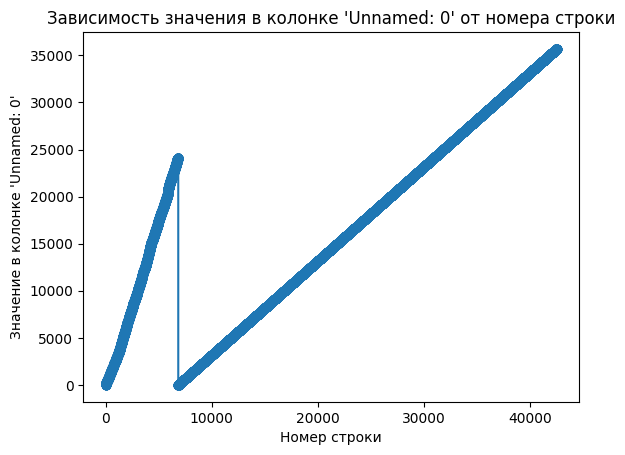

In [ ]:
# строим зависимость значения в колонке "Unnamed: 0" от номера строки
plt.plot(df.index, df["Unnamed: 0"], marker='o', linestyle='-')
plt.xlabel("Номер строки")
plt.ylabel("Значение в колонке 'Unnamed: 0'")
plt.title("Зависимость значения в колонке 'Unnamed: 0' от номера строки")
plt.show()

Вывод: по-видимому, колонка "Unnamed: 0" дублирует индексы и ее можно удалить


In [ ]:
df = df.drop("Unnamed: 0", axis=1)

**Разведочный анализ данных**
*   пропущенные значения
*   дубликаты

*   ошибочные значения (inf, отрицательные значения, значения, выпадающие из интервала допустимых значений для признака)

In [ ]:
# Проверим, есть ли строки со значениями inf или -inf в колонках с признаками:
inf_count = np.isinf(df).sum()
neg_inf_count = np.isneginf(df).sum()
total_inf_count = (inf_count + neg_inf_count).sort_values(ascending=False)
total_inf_count

ratio_sum_outstanding_to_open_sum    69
age                                   0
last_microloan_openeddt               0
is_type_credit_card_12                0
is_active_type_micro_100              0
                                     ..
is_lost_1                             0
isnt_active_1                         0
open_sum_1                            0
is_active_1                           0
target                                0
Length: 74, dtype: int64

In [ ]:
# подсчитаем количество пропущенных значений в колонках с различными признаками
non_zero_counts = df.isna().sum()[df.isna().sum() != 0]

non_zero_counts_df = pd.DataFrame({'ColumnName': non_zero_counts.index, 'Abs_value': non_zero_counts.values})
non_zero_counts_df['Rel_value'] = non_zero_counts_df['Abs_value']/len(df)*100
non_zero_counts_df.sort_values(by='Rel_value', ascending=False, inplace= True)
non_zero_counts_df.reset_index(drop=True, inplace=True)
non_zero_counts_df

,ColumnName,Abs_value,Rel_value
0,ratio_overdue_loans_3_to_12,6844,16.092549
1,ratio_sum_outstanding_to_open_sum,2800,6.583743
2,ratio_mean_delay_3_to_12,2561,6.021773
3,ratio_history_1,393,0.924075
4,ratio_history_3,218,0.512591
5,ratio_all_microloans_3_to_12,32,0.075243
6,ratio_history_12,23,0.054081
7,close_loan_median,9,0.021162
8,open_loan_median,9,0.021162
9,ratio_pattern_len_to_pattern_1,9,0.021162


In [ ]:
# Признак ratio_overdue_loans_3_to_12 фактически представляет собой константу, поэтому на таргет не влияет и его можно удалить из датафрейма.
df['ratio_overdue_loans_3_to_12'].value_counts()

0.0    35685
Name: ratio_overdue_loans_3_to_12, dtype: int64

In [ ]:
df = df.drop("ratio_overdue_loans_3_to_12", axis=1)

In [ ]:
# далее, исследуем признак ratio_sum_outstanding_to_open_sum, у которого 6,6% пропущенных значений.
print(df['ratio_sum_outstanding_to_open_sum'].isna().sum())
# также у этого признака есть строки со значениями inf или -inf:
df['ratio_sum_outstanding_to_open_sum'].value_counts()

2800


 0.000000    20605
 inf            39
 0.574407       36
-inf            15
 1.000000       14
             ...  
 0.037605        1
 0.022067        1
 0.062412        1
 0.008382        1
 0.279814        1
Name: ratio_sum_outstanding_to_open_sum, Length: 18595, dtype: int64

In [ ]:
# также у этого признака есть 1719 строк со значениями ratio_sum_outstanding_to_open_sum больше 1, что для отношения быть не должно.
print(len(df['ratio_sum_outstanding_to_open_sum'][df['ratio_sum_outstanding_to_open_sum'] > 1]))
# также у этого признака есть 4209 строк с отрицательными значениями ratio_sum_outstanding_to_open_sum, что для этого отношения быть не должно.
print(len(df['ratio_sum_outstanding_to_open_sum'][df['ratio_sum_outstanding_to_open_sum'] < 0]))

1055
4209


In [ ]:
# Поскольку у признака ratio_sum_outstanding_to_open_sum много пропущенных значений и значений, выпадающих из интервала допустимых значений для этого признака, то удаляем его.
df = df.drop("ratio_sum_outstanding_to_open_sum", axis=1)

In [ ]:
# далее, исследуем признак ratio_mean_delay_3_to_12, у которого 6,0% пропущенных значений.
df['ratio_mean_delay_3_to_12'].value_counts()

0.000000    25274
1.000000     5301
0.500000      870
0.194444      289
0.333333      188
            ...  
0.339833        1
0.442308        1
0.105572        1
0.347222        1
0.644068        1
Name: ratio_mean_delay_3_to_12, Length: 4353, dtype: int64

In [ ]:
# Для признака 'ratio_mean_delay_3_to_12' значений по модулю больше 1 не наблюдалось, что хорошо.
(df['ratio_mean_delay_3_to_12'].abs() > 1).sum()

0

<Axes: >

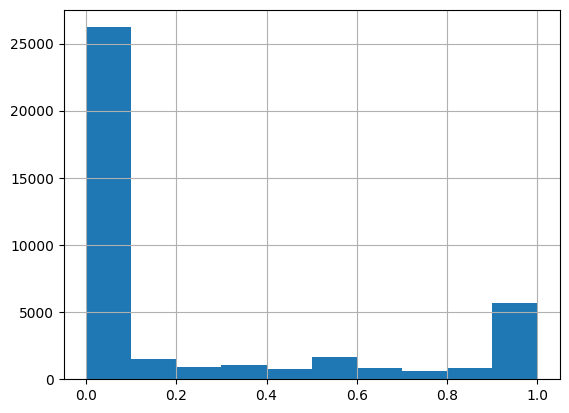

In [ ]:
# Оцениваем распределение признака ratio_mean_delay_3_to_12 для выбора стратегии заполнения пропусков
df['ratio_mean_delay_3_to_12'].hist()

In [ ]:
# Пропуски в признаке ratio_mean_delay_3_to_12 будем заполнять медианным значением
df['ratio_mean_delay_3_to_12'].fillna(df['ratio_mean_delay_3_to_12'].median(), inplace=True)
print(df['ratio_mean_delay_3_to_12'].isna().sum())

0


In [ ]:
# После этих преобразований в датасете остается 729 пропущенных значений в оставшихся колонках
non_zero_counts = df.isna().sum()[df.isna().sum() != 0]

non_zero_counts_df = pd.DataFrame({'ColumnName': non_zero_counts.index, 'Abs_value': non_zero_counts.values})
non_zero_counts_df['Rel_value'] = non_zero_counts_df['Abs_value']/len(df)*100
non_zero_counts_df.sort_values(by='Rel_value', ascending=False, inplace= True)
non_zero_counts_df.reset_index(drop=True, inplace=True)
print(sum(non_zero_counts_df['Abs_value']))
non_zero_counts_df

729


,ColumnName,Abs_value,Rel_value
0,ratio_history_1,393,0.924075
1,ratio_history_3,218,0.512591
2,ratio_all_microloans_3_to_12,32,0.075243
3,ratio_history_12,23,0.054081
4,close_loan_median,9,0.021162
5,open_loan_median,9,0.021162
6,ratio_pattern_len_to_pattern_1,9,0.021162
7,ratio_pattern_len_to_pattern_2,9,0.021162
8,ratio_pattern_len_to_pattern_3,9,0.021162
9,ratio_pattern_len_to_pattern_4,9,0.021162


In [ ]:
print(len(df))
df.dropna(inplace=True)
len(df)

42529


42134

In [ ]:
# Теперь пропущенных значений не осталось
non_zero_counts = df.isna().sum()[df.isna().sum() != 0]

non_zero_counts_df = pd.DataFrame({'ColumnName': non_zero_counts.index, 'Abs_value': non_zero_counts.values})
non_zero_counts_df['Rel_value'] = non_zero_counts_df['Abs_value']/len(df)*100
non_zero_counts_df.sort_values(by='Rel_value', ascending=False, inplace= True)
non_zero_counts_df.reset_index(drop=True, inplace=True)
print(sum(non_zero_counts_df['Abs_value']))
non_zero_counts_df

0


,ColumnName,Abs_value,Rel_value


In [ ]:
# в датасете также присутсвуют 187 строк-дубликатов. удалим их из датасета
print(len(df[df.duplicated()]))
df.drop_duplicates(inplace=True)

187


In [ ]:
# проверяем наличие отрицательных значений в оставшемся датафрейме: их нет, что хорошо.
df[df < 0].sum().sort_values()

age                               0.0
is_active_type_micro_100          0.0
is_active_type_consumer_100       0.0
is_active_type_credit_card_100    0.0
is_type_micro_100                 0.0
                                 ... 
is_active_1                       0.0
micro_loans_active_3              0.0
overdue_loans_3                   0.0
overall_worst_overdue_state_12    0.0
target                            0.0
Length: 72, dtype: float64

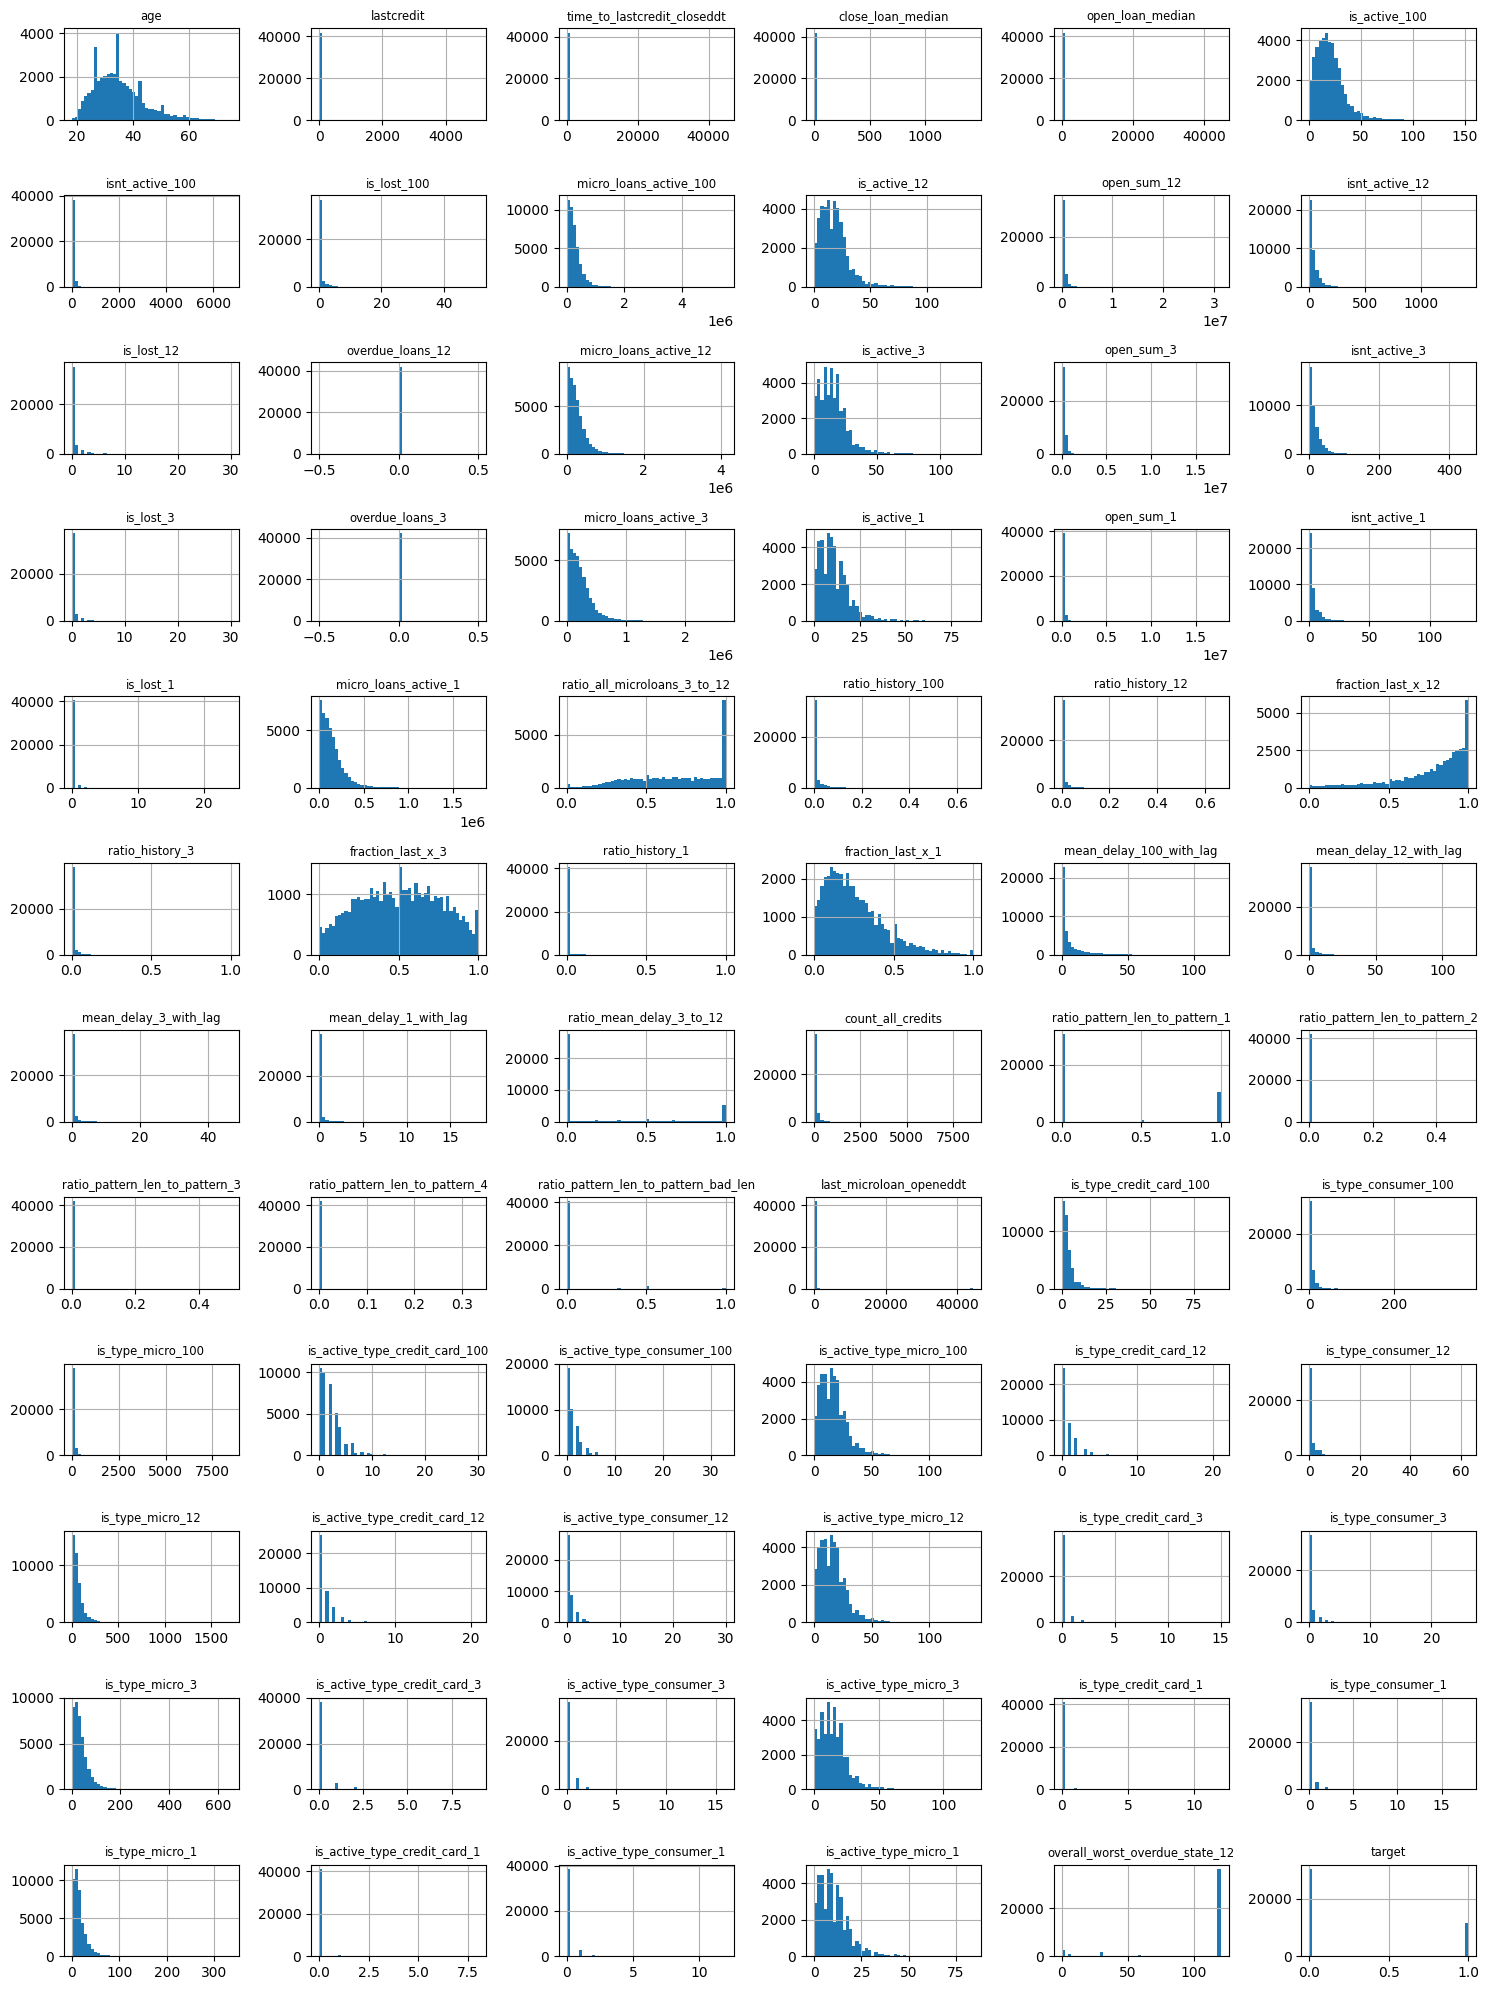

In [ ]:
# Визуализируем распределение признаков
axes = df.hist(figsize=(15, 20), bins=50, layout=(12, 6))
# Снизим размер шрифта названий гистограмм, чтобы длинные названия не наползали друг на друга
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize='small')
plt.tight_layout()
plt.show()

<Axes: >

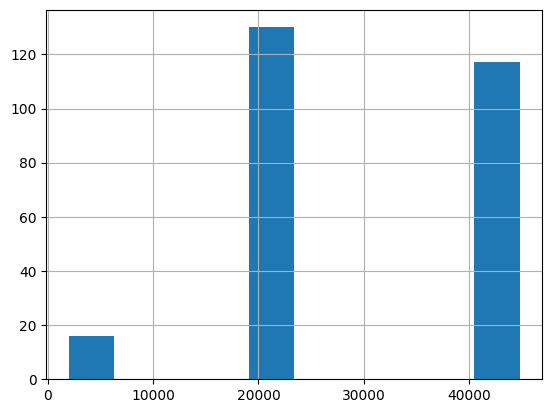

In [ ]:
# есть значения-выбросы в районе 20тысяч и 40 тысяч дней
df['open_loan_median'][df['open_loan_median']> 2000].hist()
# полагаю, что значения в этом признаке больше 15000 дней (более 40 лет) ошибочны, и эти строки можно удалить из датасета

In [ ]:
print(len(df))
df = df.loc[~(df['open_loan_median'] > 15000)]
len(df)

41947


41700

In [ ]:
# непонятно, что за данные в этом признаке 'isnt_active_100', так они почти все больше 1 и временами сильно. А это доля.
# Если это в %, то все равно есть 6201 строк, где значение больше 100. Поэтому удаляю этот признак
df['isnt_active_100'][df['isnt_active_100']>100]

6        157.0
13       233.0
15       232.0
16       130.0
19       105.0
         ...  
42486    113.0
42498    127.0
42504    208.0
42508    105.0
42525    110.0
Name: isnt_active_100, Length: 6201, dtype: float64

In [ ]:
df = df.drop("isnt_active_100", axis=1)

In [ ]:
# все значения признака overdue_loans_12 нули, то это есть признак константный и на таргет не влияет, поэтому следует этот признак удалить.
print(df['overdue_loans_12'].value_counts())
df = df.drop("overdue_loans_12", axis=1)

0.0    41700
Name: overdue_loans_12, dtype: int64


In [ ]:
# все значения признака overdue_loans_3 нули, то это есть признак константный и на таргет не влияет, поэтому следует этот признак удалить.
print(df['overdue_loans_3'].value_counts())
df = df.drop("overdue_loans_3", axis=1)

0.0    41700
Name: overdue_loans_3, dtype: int64


In [ ]:
# полагаю, что значения в признаке last_microloan_oeneddpt больше 15000 дней (более 40 лет) ошибочны, и эти строки можно удалить из датасета
print(len(df))
df = df.loc[~(df['last_microloan_openeddt'] > 15000)]
len(df)

41700


41642

In [ ]:
# нет описания для признака overall_worst_overdue_state_12 - предполагаю, что это количество просроченной задолженности (в днях??) за год, но есть сомнения
df['overall_worst_overdue_state_12'].value_counts()

120.0    36022
0.0       2454
29.0      1749
7.0        822
59.0       361
89.0       133
119.0      101
Name: overall_worst_overdue_state_12, dtype: int64

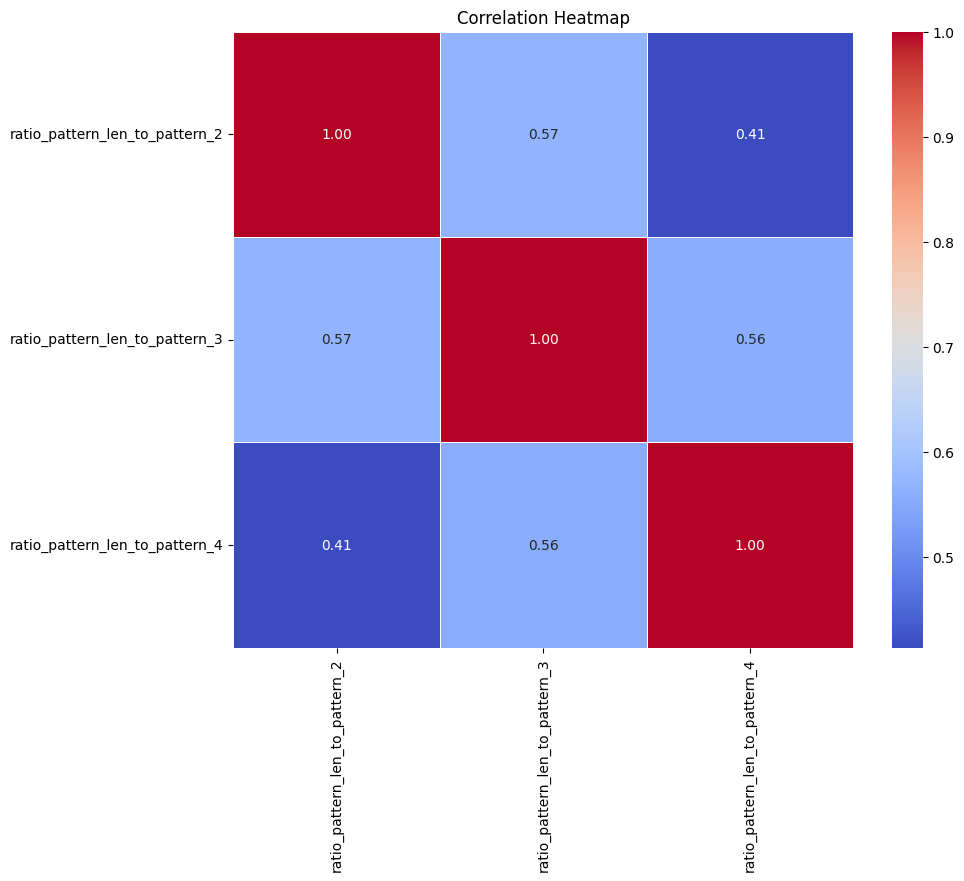

In [ ]:
# Изучим корреляцию между собой признаков ratio_pattern_len_to_pattern_2,ratio_pattern_len_to_pattern_3 и ratio_pattern_len_to_pattern_4, имеющих очень похожее распределение на гистограмме.
# корряляция наблюдается, но не очень высокая, поэтому оставляю все 3 признака в датасете
ratio_pattern_features = ['ratio_pattern_len_to_pattern_2', 'ratio_pattern_len_to_pattern_3', 'ratio_pattern_len_to_pattern_4']
ratio_pattern_correlation_matrix = df[ratio_pattern_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(ratio_pattern_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

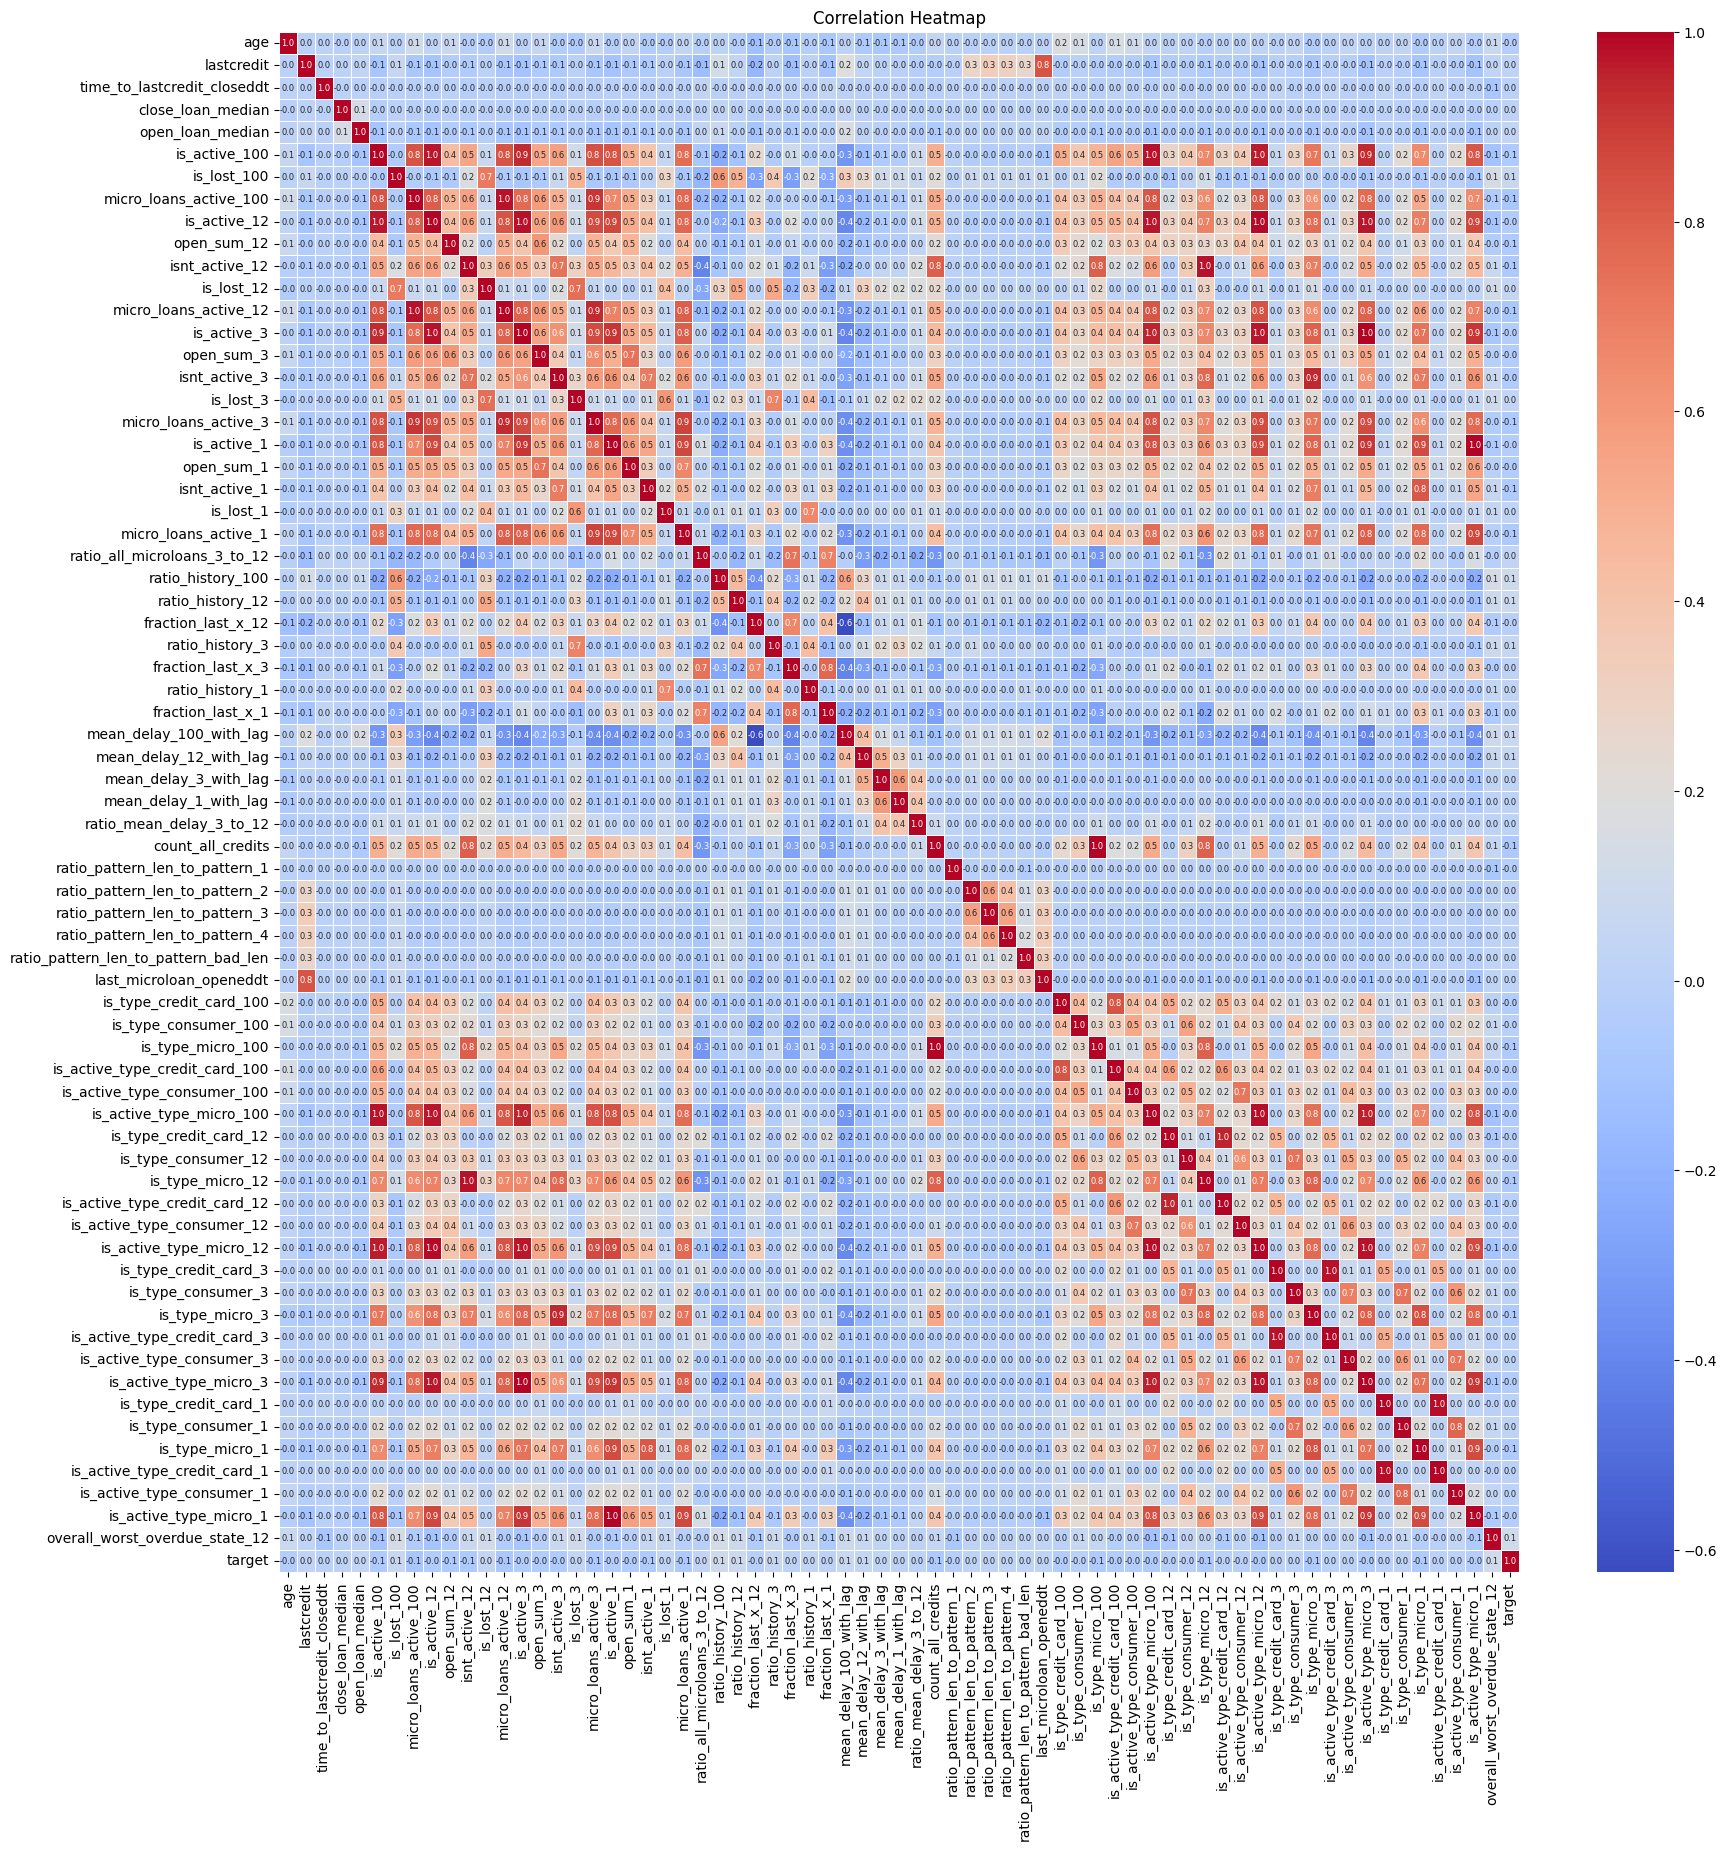

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5, annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Проанализируем корреляцию признаков с целевой переменной: признаков с выскокой корреляцией с целевой переменной не обнаружено
correlation_dict = {}

for col in df.columns:
    try:
        correlation = np.corrcoef(df[col], df['target'])[0][1]
        correlation_dict[col] = correlation
    except:
        pass

sorted_correlation = sorted(correlation_dict.items(), key=lambda x: x[1], reverse=True)

for col, correlation in sorted_correlation:
    print(f"{col}: {correlation:.3f}")

target: 1.000
overall_worst_overdue_state_12: 0.110
ratio_history_100: 0.105
ratio_history_12: 0.082
mean_delay_100_with_lag: 0.069
is_lost_100: 0.064
ratio_history_3: 0.056
mean_delay_12_with_lag: 0.051
is_lost_12: 0.043
open_loan_median: 0.040
is_lost_3: 0.038
ratio_all_microloans_3_to_12: 0.031
ratio_history_1: 0.031
mean_delay_3_with_lag: 0.028
is_lost_1: 0.028
lastcredit: 0.023
ratio_pattern_len_to_pattern_4: 0.023
ratio_pattern_len_to_pattern_2: 0.019
ratio_pattern_len_to_pattern_3: 0.019
ratio_pattern_len_to_pattern_bad_len: 0.019
last_microloan_openeddt: 0.019
mean_delay_1_with_lag: 0.017
is_type_consumer_1: 0.015
fraction_last_x_1: 0.015
close_loan_median: 0.013
fraction_last_x_3: 0.013
is_type_consumer_3: 0.011
ratio_mean_delay_3_to_12: 0.010
is_active_type_consumer_1: 0.009
is_active_type_consumer_3: 0.008
is_active_type_credit_card_3: 0.006
is_type_credit_card_3: 0.005
is_active_type_credit_card_1: 0.004
is_type_credit_card_1: 0.003
time_to_lastcredit_closeddt: 0.001
is_typ

In [ ]:
# таким образом, после обработки датасета new_training_data осталось 68 признаков и 41642 наблюдения
df.shape

(41642, 69)

In [ ]:
# сохраняем обработанный датасет
df_processed = df
df_processed.to_csv('/content/drive/MyDrive/apsolutions_test_task/df_processed.csv', index=False)

**Характеристика клиенсткого портфеля организации**

In [ ]:
# у 97.5% клиентов доля невозврата ниже 10%
round(sum(df['ratio_history_100'] < 0.1)/len(df['ratio_history_100']), 3)

0.975

In [ ]:
# Большая часть активных кредитов взята за последний год
print(f" 'медиана количества взятых кредитов за все время' - {round(df['is_active_100'].median(),2)}, 'среднее количества взятых кредитов за все время' - {round(df['is_active_100'].mean(),2)}")
print(f" 'медиана количества взятых кредитов за последний год' - {round(df['is_active_12'].median(),2)}, 'среднее количества взятых кредитов за последний год' - {round(df['is_active_12'].mean(),2)}")
print(f" 'медиана количества взятых кредитов за последние 3 месяца' - {round(df['is_active_3'].median(),2)}, 'среднее количества взятых кредитов за последние 3 месяца' - {round(df['is_active_3'].mean(),2)}")

 'медиана количества взятых кредитов за все время' - 18.0, 'среднее количества взятых кредитов за все время' - 20.69
 'медиана количества взятых кредитов за последний год' - 16.0, 'среднее количества взятых кредитов за последний год' - 18.22
 'медиана количества взятых кредитов за последние 3 месяца' - 14.0, 'среднее количества взятых кредитов за последние 3 месяца' - 15.64


In [ ]:
# оценим, стали ли люди чаще брать кредиты за последнее время: да стали, 85% (среднее) всех кредитов взяты за последний год, а 51% за последние 3 месяца.
print(f" 'медиана доли кредитов, взятых за последние 12 месяцев, относительно всех кредитов истории' - {round(df['fraction_last_x_12'].median(),2)}, 'а среднее этой же доли' - {round(df['fraction_last_x_12'].mean(),2)}")
print(f" 'медиана доли кредитов, взятых за последние 3 месяца, относительно всех кредитов истории' - {round(df['fraction_last_x_3'].median(),2)}, 'а среднее этой же доли' - {round(df['fraction_last_x_3'].mean(),2)}")
print(f" 'медиана доли кредитов, взятых за последний месяц, относительно всех кредитов истории' - {round(df['fraction_last_x_1'].median(),2)}, 'а среднее этой же доли' - {round(df['fraction_last_x_1'].mean(),2)}")

 'медиана доли кредитов, взятых за последние 12 месяцев, относительно всех кредитов истории' - 0.85, 'а среднее этой же доли' - 0.77
 'медиана доли кредитов, взятых за последние 3 месяца, относительно всех кредитов истории' - 0.51, 'а среднее этой же доли' - 0.51
 'медиана доли кредитов, взятых за последний месяц, относительно всех кредитов истории' - 0.22, 'а среднее этой же доли' - 0.25


In [ ]:
# оценим, какое количество разных кредитных продуктов клиенты брали за все время
print(f" 'медиана количество кредитов типа 'кредитная карта', открытых за всё время' - {round(df['is_type_credit_card_100'].median(),2)}, 'а среднее количество' - {round(df['is_type_credit_card_100'].mean(),2)}")
print(f" 'медиана количество кредитов типа 'потребительский кредит', открытых за всё время' - {round(df['is_type_consumer_100'].median(),2)}, 'а среднее количество' - {round(df['is_type_consumer_100'].mean(),2)}")
print(f" 'медиана количество кредитов типа 'микрокредит', открытых за всё время' - {round(df['is_type_micro_100'].median(),2)}, 'а среднее количество' - {round(df['is_type_micro_100'].mean(),2)}")

 'медиана количество кредитов типа 'кредитная карта', открытых за всё время' - 2.0, 'а среднее количество' - 3.15
 'медиана количество кредитов типа 'потребительский кредит', открытых за всё время' - 3.0, 'а среднее количество' - 5.47
 'медиана количество кредитов типа 'микрокредит', открытых за всё время' - 59.0, 'а среднее количество' - 85.92


In [ ]:
# оценим, какое количество активных кредитных продуктов, взятых за все время, есть у клиентов
print(f" 'медиана количество активных кредитов типа 'кредитная карта', открытых за всё время' - {round(df['is_active_type_credit_card_100'].median(),2)}, 'а среднее количество' - {round(df['is_active_type_credit_card_100'].mean(),2)}")
print(f" 'медиана количество активных кредитов типа 'потребительский кредит', открытых за всё время' - {round(df['is_active_type_consumer_100'].median(),2)}, 'а среднее количество' - {round(df['is_active_type_consumer_100'].mean(),2)}")
print(f" 'медиана количество активных кредитов типа 'микрокредит', открытых за всё время' - {round(df['is_active_type_micro_100'].median(),2)}, 'а среднее количество' - {round(df['is_active_type_micro_100'].mean(),2)}")

 'медиана количество активных кредитов типа 'кредитная карта', открытых за всё время' - 2.0, 'а среднее количество' - 2.06
 'медиана количество активных кредитов типа 'потребительский кредит', открытых за всё время' - 1.0, 'а среднее количество' - 1.19
 'медиана количество активных кредитов типа 'микрокредит', открытых за всё время' - 16.0, 'а среднее количество' - 17.38


In [ ]:
# среднее и медиана величины активного кредита, открытого за последние 12 месяцев
print(f" 'средний размер активного кредита, открытого за последние 12 месяцев' -  {round((df['open_sum_12']/df['is_active_12']).mean())}")
print(f" 'медиана размера активного кредита, открытого за последние 12 месяцев' -  {round((df['open_sum_12']/df['is_active_12']).median())}")

 'средний размер активного кредита, открытого за последние 12 месяцев' -  23348
 'медиана размера активного кредита, открытого за последние 12 месяцев' -  16004


In [ ]:
# среднее и медиана величины активного кредита, открытого за последние 3 месяца
print(f" 'средний размер активного кредита, открытого за последние 3 месяца' -  {round((df['open_sum_3']/df['is_active_3']).mean())}")
print(f" 'медиана размера активного кредита, открытого за последние 3 месяца' -  {round((df['open_sum_3']/df['is_active_3']).median())}")

 'средний размер активного кредита, открытого за последние 3 месяца' -  15895
 'медиана размера активного кредита, открытого за последние 3 месяца' -  13685


In [ ]:
# среднее и медиана величины активного кредита, открытого за последний месяц
print(f" 'средний размер активного кредита, открытого за последний месяц' -  {round((df['open_sum_1']/df['is_active_1']).mean())}")
print(f" 'медиана размера активного кредита, открытого за последний месяц' -  {round((df['open_sum_1']/df['is_active_1']).median())}")

 'средний размер активного кредита, открытого за последний месяц' -  13527
 'медиана размера активного кредита, открытого за последний месяц' -  12158


In [ ]:
# среднее и медиана величины активного микрокредита, открытого за последние 12 месяцев
print(f" 'средний размер активного микрокредита, открытого за последние 12 месяцев' -  {round((df['micro_loans_active_12']/df['is_active_type_micro_12']).mean())}")
print(f" 'медиана размера активного микрокредита, открытого за последние 12 месяцев' -  {round((df['micro_loans_active_12']/df['is_active_type_micro_12']).median())}")

 'средний размер активного микрокредита, открытого за последние 12 месяцев' -  15029
 'медиана размера активного микрокредита, открытого за последние 12 месяцев' -  13818


In [ ]:
# среднее и медиана величины активного микрокредита, открытого за последние 3 месяца
print(f" 'средний размер активного микрокредита, открытого за последние 3 месяца' -  {round((df['micro_loans_active_3']/df['is_active_type_micro_3']).mean())}")
print(f" 'медиана размера активного микрокредита, открытого за последние 3 месяца' -  {round((df['micro_loans_active_3']/df['is_active_type_micro_3']).median())}")

 'средний размер активного микрокредита, открытого за последние 3 месяца' -  14237
 'медиана размера активного микрокредита, открытого за последние 3 месяца' -  13342


In [ ]:
# среднее и медиана величины активного микрокредита, открытого за последний месяц
print(f" 'средний размер активного микрокредита, открытого за последний месяц' -  {round((df['micro_loans_active_1']/df['is_active_type_micro_1']).mean())}")
print(f" 'медиана размера активного микрокредита, открытого за последний месяц' -  {round((df['micro_loans_active_1']/df['is_active_type_micro_1']).median())}")

 'средний размер активного микрокредита, открытого за последний месяц' -  12964
 'медиана размера активного микрокредита, открытого за последний месяц' -  12100


In [ ]:
df['age'].median()

33.0

In [ ]:
# смотрим, как распределяется доля банкротов среди клиентов разных возрастных групп
bins = [0, 30, 40, 50, 60, 70, 80]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group_counts = df.groupby(['age_group', 'target']).size().unstack()
age_group_counts

target,0.0,1.0
age_group,,
0-29,8775,3726
30-39,13755,5075
40-49,5543,1864
50-59,1643,592
60-69,443,180
70-79,32,14


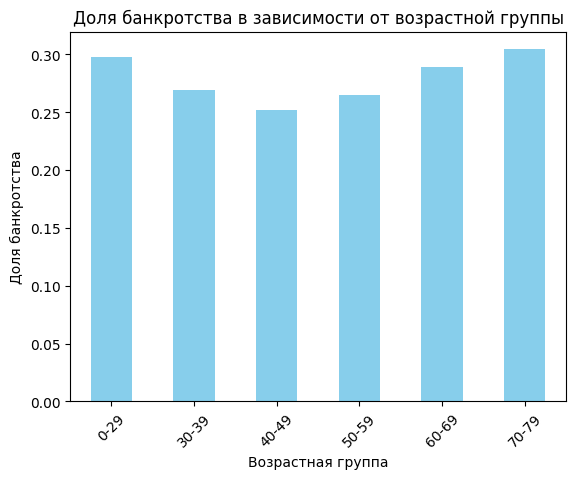

In [ ]:
(age_group_counts[1] / (age_group_counts[0] + age_group_counts[1])).plot(kind='bar', color='skyblue')
plt.title('Доля банкротства в зависимости от возрастной группы')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля банкротства')
plt.xticks(rotation=45)
plt.show()

**Модели прогнозирования банкротства**

**у нас задача бинарной классификации. целевая переменная имеет 2 значения 0 (нет банкротства) и 1 (банкротство). Нам нужно, чтобы модель выдавала полноту не менее 35% клиентов при банкротстве среди одобренных не выше 15%. То есть мы предсказываем ответ "0" у целевой переменной и recall должен  не менее 35%, а precision не менее 85%**

In [3]:
df_processed = pd.read_csv('/content/drive/MyDrive/apsolutions_test_task/df_processed.csv')
df_processed

,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,...,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12,target
0,35.0,3.0,0.0,0.0,1.0,41.0,0.0,627578.0,39.0,1902599.0,...,0.0,33.0,0.0,0.0,20.0,0.0,0.0,14.0,7.0,0.0
1,27.0,19.0,65.0,0.0,7.0,25.0,0.0,214655.0,9.0,96195.0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,1.0
2,32.0,14.0,76.0,0.0,11.5,13.0,0.0,88856.0,11.0,88856.0,...,0.0,9.0,0.0,0.0,5.0,0.0,0.0,5.0,59.0,1.0
3,23.0,5.0,0.0,0.0,1.0,26.0,0.0,345820.0,26.0,371008.0,...,0.0,19.0,0.0,0.0,16.0,0.0,0.0,12.0,29.0,0.0
4,26.0,1.0,0.0,0.0,1.0,11.0,0.0,95370.0,11.0,95370.0,...,0.0,8.0,0.0,0.0,26.0,0.0,0.0,4.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41637,51.0,4.0,0.0,0.0,5.0,18.0,3.0,287540.0,16.0,294403.0,...,0.0,12.0,0.0,0.0,5.0,0.0,0.0,4.0,120.0,0.0
41638,44.0,4.0,0.0,0.0,1.5,30.0,7.0,283504.0,23.0,298504.0,...,1.0,18.0,0.0,1.0,18.0,0.0,1.0,13.0,120.0,1.0
41639,28.0,27.0,0.0,0.0,514.0,1.0,1.0,7000.0,1.0,7000.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.0
41640,35.0,8.0,0.0,0.0,1.0,20.0,1.0,258844.0,18.0,258844.0,...,0.0,16.0,0.0,0.0,10.0,0.0,0.0,9.0,120.0,1.0


In [5]:
# для предсказания целевой переменной сформируем матрицу X объект-признак и вектор y целевой переменной.
X = df_processed.drop('target', axis=1)
y = df_processed['target']

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# поскольку для ряда моделей важно масштабирование признаков, отмасштабируем признаки при помощи StandardScaler, обучив StandardScaler на трейне и применив масштабирование к трейну и к тесту
ss = StandardScaler()
ss.fit(Xtrain)

Xtrain = pd.DataFrame(ss.transform(Xtrain), columns=X.columns)
Xtest = pd.DataFrame(ss.transform(Xtest), columns=X.columns)

Xtrain.head()

,age,lastcredit,time_to_lastcredit_closeddt,close_loan_median,open_loan_median,is_active_100,is_lost_100,micro_loans_active_100,is_active_12,open_sum_12,...,is_active_type_credit_card_3,is_active_type_consumer_3,is_active_type_micro_3,is_type_credit_card_1,is_type_consumer_1,is_type_micro_1,is_active_type_credit_card_1,is_active_type_consumer_1,is_active_type_micro_1,overall_worst_overdue_state_12
0,-0.429904,-0.012506,-0.031497,-0.018487,-0.020955,-0.690445,-0.360870,-0.630266,-0.638104,-0.424623,...,-0.264431,-0.343869,-0.479853,-0.124436,-0.283782,-0.569545,-0.127463,-0.261443,-0.589391,0.382784
1,0.023796,-0.161022,-0.031497,-0.018487,-0.091673,0.018594,0.822057,-0.439544,0.134084,0.267621,...,-0.264431,-0.343869,0.146223,-0.124436,-0.283782,0.058304,-0.127463,-0.261443,0.117964,0.382784
2,0.931194,-0.012506,-0.031497,-0.018487,0.062621,-0.903157,-0.360870,-0.589876,-1.101417,-0.508267,...,-0.264431,-0.343869,-1.284809,-0.124436,-0.283782,-0.946254,-0.127463,-0.261443,-1.178853,-2.141507
3,0.817769,-0.111517,-0.031497,-0.018487,-0.098101,1.720288,-0.360870,1.938315,1.832897,0.594609,...,-0.264431,5.059138,1.308936,-0.124436,4.598403,1.000077,-0.127463,7.453645,1.178996,0.382784
4,0.817769,-0.037259,-0.031497,-0.018487,-0.098101,-0.265022,-0.360870,-0.344832,-0.406448,-0.249978,...,-0.264431,1.457133,-0.300974,-0.124436,-0.283782,0.058304,-0.127463,-0.261443,0.117964,0.382784


**Логистическая регрессия**

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [ ]:
probs = model.predict_proba(Xtest)

probs[:10]

array([[0.7632378 , 0.2367622 ],
       [0.8771711 , 0.1228289 ],
       [0.59116887, 0.40883113],
       [0.76862785, 0.23137215],
       [0.704819  , 0.295181  ],
       [0.71800213, 0.28199787],
       [0.88822278, 0.11177722],
       [0.65371933, 0.34628067],
       [0.65306583, 0.34693417],
       [0.68535008, 0.31464992]])

In [ ]:
probs_bust = probs[:,1]

In [ ]:
# интересует предсказание класса "0" - нет банкротства: немного не добираем до плановых показателей (recall должен не менее 35%, а precision не менее 85%)
classes = probs_bust > 0.238
print(classification_report(ytest, classes))

              precision    recall  f1-score   support

         0.0       0.84      0.36      0.50      7548
         1.0       0.33      0.82      0.47      2863

    accuracy                           0.48     10411
   macro avg       0.58      0.59      0.48     10411
weighted avg       0.70      0.48      0.49     10411



In [ ]:
# попробуем с помощью GridSearch и кросс-валидации подобрать гиперпараметры логистической регрессии
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression(max_iter=1000)
logreg_cv=GridSearchCV(logreg,param_grid,cv=5)
logreg_cv.fit(Xtrain,ytrain)

In [ ]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}


In [ ]:
# обучаем с подобранными гиперпараметрами
model = LogisticRegression(max_iter=1000, C = 0.01, penalty='l2')
model.fit(Xtrain, ytrain)
probs = model.predict_proba(Xtest)
probs_bust = probs[:,1]

In [ ]:
# интересует предсказание класса "0" - нет банкротства: все равно не добираем до плановых показателей (recall должен не менее 35%, а precision не менее 85%)
classes = probs_bust > 0.226
print(classification_report(ytest, classes))

              precision    recall  f1-score   support

         0.0       0.85      0.30      0.45      7548
         1.0       0.32      0.86      0.46      2863

    accuracy                           0.45     10411
   macro avg       0.58      0.58      0.45     10411
weighted avg       0.70      0.45      0.45     10411



**Проанализируем еще несколько базовых алгоритмов**

In [ ]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier()))

results = []
names = []
scoring = 'roc_auc'

for name, model in tqdm(models, desc="Processing models", unit="model"):
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Processing models:  20%|██        | 1/5 [00:09<00:38,  9.73s/model]

LR: 0.631725 (0.002854)


Processing models:  40%|████      | 2/5 [00:18<00:26,  8.93s/model]

KNN: 0.558506 (0.009342)


Processing models:  60%|██████    | 3/5 [00:18<00:10,  5.01s/model]

NB: 0.583330 (0.004315)


Processing models:  80%|████████  | 4/5 [13:29<05:15, 315.29s/model]

SVM: 0.584360 (0.004395)


Processing models: 100%|██████████| 5/5 [14:42<00:00, 176.56s/model]

RF: 0.623875 (0.007023)


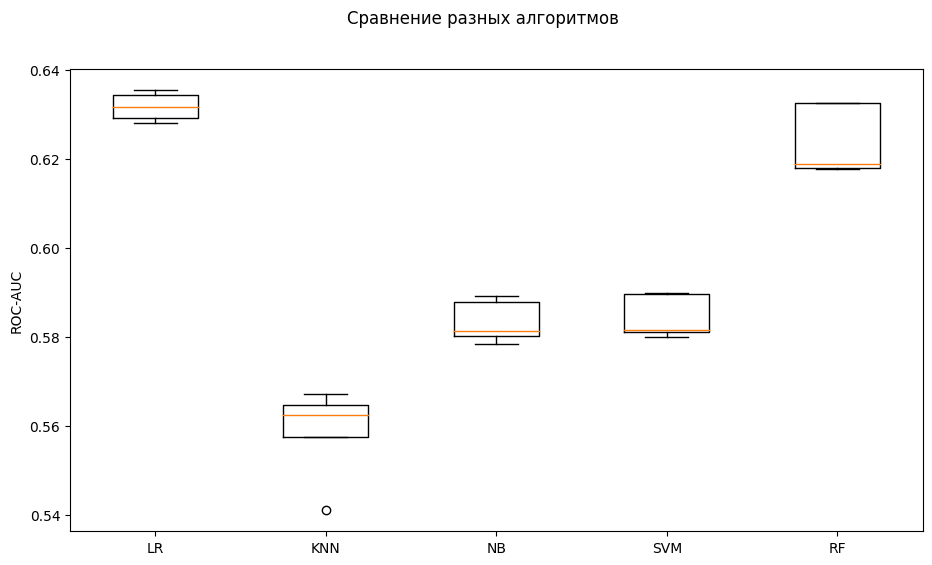

In [ ]:
fig = plt.figure(figsize=(11, 6))
fig.suptitle('Сравнение разных алгоритмов')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('ROC-AUC')
plt.show()

**Случайный лес**

In [ ]:
# подберем гиперпараметры на кросс-валидации для случайного леса
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(Xtrain, ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [4, 7, 15, 20],
                         'n_estimators': [3, 5, 10, 25, 50, 150]},
             scoring='roc_auc', verbose=1)

In [ ]:
print(grid_search.best_score_) # roc-auc
print(grid_search.best_params_)

0.6417058126205971
{'max_depth': 10, 'max_features': 20, 'n_estimators': 150}


In [ ]:
# c подобранными гиперпараметрами обучаю случайный лес
rf = RandomForestClassifier(max_depth=10, max_features=20, n_estimators=150, random_state=42)

rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=10, max_features=20, n_estimators=150,
                       random_state=42)

In [ ]:
rf.predict_proba(Xtest)

array([[0.7993279 , 0.2006721 ],
       [0.86207311, 0.13792689],
       [0.62262981, 0.37737019],
       ...,
       [0.7270865 , 0.2729135 ],
       [0.66518679, 0.33481321],
       [0.75594461, 0.24405539]])

In [ ]:
probs = rf.predict_proba(Xtest)
rf_probs_bust = probs[:,1]

In [ ]:
classes = rf_probs_bust > 0.25 # опять немного не добираем по точности для класса 0.
print(classification_report(ytest, classes))

              precision    recall  f1-score   support

         0.0       0.83      0.43      0.57      7548
         1.0       0.34      0.76      0.47      2863

    accuracy                           0.52     10411
   macro avg       0.58      0.60      0.52     10411
weighted avg       0.69      0.52      0.54     10411



**CatBoost**

In [ ]:
param_grid = {"iterations": [70,90,110,130,150],
              "depth":[7,8,9,10,12,15],
              "learning_rate": [0.025, 0.05, 0.075, 0.1]}

model = CatBoostClassifier(loss_function='Logloss',
                          eval_metric='AUC',
                          verbose=False,
                          random_state=42)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(Xtrain, ytrain, eval_set=(Xtest, ytest))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [ ]:
print(grid_search.best_score_) # roc-auc
print(grid_search.best_params_)

In [7]:
train_set = Pool(Xtrain, ytrain)
test_set = Pool(Xtest, ytest)

In [27]:
gbm = CatBoostClassifier(iterations=110,
                          depth=10,
                          learning_rate=0.05,
                          loss_function='Logloss',
                          eval_metric='AUC',
                          verbose=False)
gbm.fit(train_set, eval_set=test_set)
gbm_preds = gbm.predict_proba(Xtest)

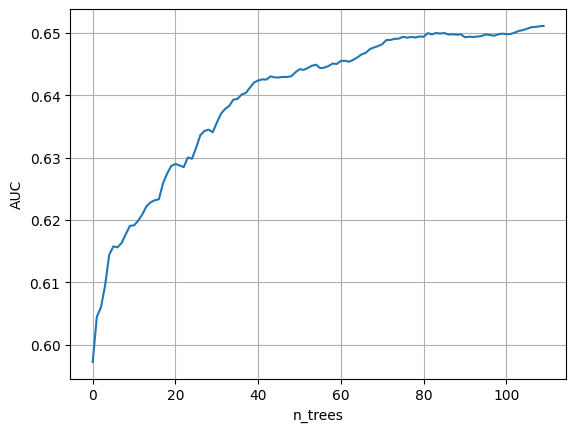

In [28]:
eval_metrics = gbm.get_evals_result()
plt.plot(eval_metrics['validation']['AUC'])
plt.xlabel('n_trees')
plt.ylabel('AUC')
plt.grid()

In [34]:
# мы предсказываем ответ "0" у целевой переменной и recall должен не менее 35%, а precision не менее 85%
gbm_classes = (gbm_preds[:, 1] > 0.23)
print(classification_report(ytest, gbm_classes))

              precision    recall  f1-score   support

         0.0       0.85      0.36      0.50      7548
         1.0       0.33      0.83      0.47      2863

    accuracy                           0.49     10411
   macro avg       0.59      0.59      0.49     10411
weighted avg       0.70      0.49      0.49     10411



In [39]:
feature_importance = gbm.get_feature_importance()
feature_importance_df = pd.DataFrame({'Feature': gbm.feature_names_, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
67,overall_worst_overdue_state_12,7.357283
0,age,4.094682
20,isnt_active_1,3.898198
28,fraction_last_x_3,3.866928
32,mean_delay_12_with_lag,3.282829
...,...,...
2,time_to_lastcredit_closeddt,0.060065
64,is_active_type_credit_card_1,0.034381
38,ratio_pattern_len_to_pattern_2,0.013458
39,ratio_pattern_len_to_pattern_3,0.000000


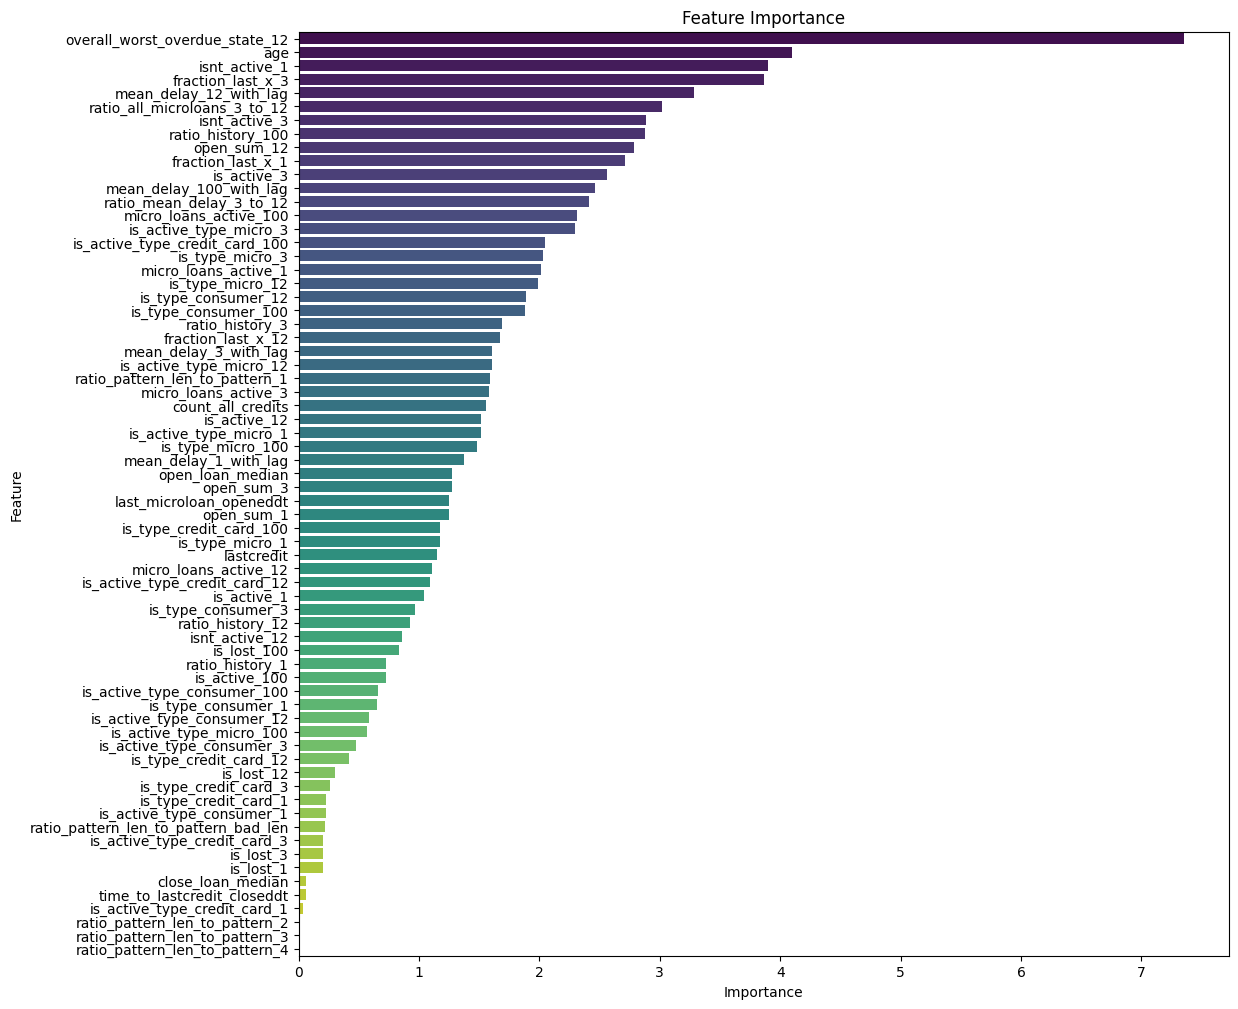

In [43]:
plt.figure(figsize=(12, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Таким образом, наилучшее качество на отложенной выборке продемонстрировал алгоритм Catboost c гиперпараметрами (iterations=110,                       depth=10, learning_rate=0.05), который выявлял 36% клиентов класса "0" (отсутствие банкротства) с точностью 85%, то есть доля банкротства среди одобренных не выше 15%. Наиболее значимыми для модели оказались признаки overall_worst_overdue_state_12, age, isnt_active_1, fraction_last_x_3, mean_delay_12_with_lag, ratio_all_microloans_3_to_12.**